# ANÁLISIS DE DATOS DEL MUNICIPIO DE MONTERREY – AÑO 2014

#### INTEGRANTES:
Alejandro Salazar

Gabriela Uquillas

## MODELO SUPERVISADO

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
compras_df = pd.read_csv('clean_pago_anual.csv')

In [3]:
data=compras_df.copy()

In [4]:
#utiliza el for con un indice para en una lista almacenar el tipo de dato en cadena
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    #si el tipo de dato es object
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [5]:
data.head(5)

,FECHA,FACTURA,BENEFICIARIO,CONCEPTO,IMPORTE,FECHA DEL PAGO POR CADENAS,RFC
0,0,2182,149,1240,2946,0,309
1,0,2018,758,1238,16,-1,-1
2,0,3190,331,570,31,-1,-1
3,0,2119,350,1238,15,-1,-1
4,0,755,732,1238,2,-1,-1


### Implementar Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = data.pop('IMPORTE')
X = data.copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
clf = RandomForestRegressor(n_estimators=1000, max_depth = 4)

In [11]:
clf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

### Evaluar al modelo

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_score(y_test, clf.predict(X_test))

0.05017503737088702

## MODELO NO SUPERVISADO

###  Implementar K-means y PCA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
compras_df['FACTURA'] = pd.to_numeric(compras_df['FACTURA'], errors='coerce')

In [16]:
compras_df['IMPORTE'] = pd.to_numeric(compras_df['IMPORTE'], errors='coerce')

In [17]:
X = compras_df[['IMPORTE','FACTURA']].copy()

In [18]:
X = X.dropna()

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Método del "Codo de Jambú" para encontrar el número óptimo de clusters al utilizar K-means 

In [20]:
inertia = []
k_range = range(1, 11) 

In [21]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\jossu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jossu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jossu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jossu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jossu\anaconda3\Lib\site-packages\sklearn\clust

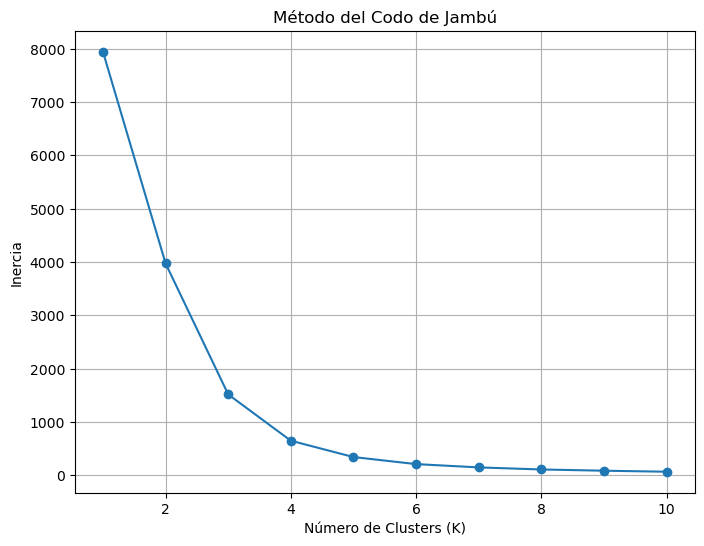

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo de Jambú')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

### Implementar una gráfica de dispersión que visualiza los clusters obtenidos mediante K-means en el espacio reducido de 2 dimensiones usando PCA.

In [23]:
X = X.reset_index(drop=True)
compras_df = compras_df.loc[X.index].reset_index(drop=True)

In [24]:
optimal_k = 3  # Puedes ajustar esto según la gráfica obtenida

# iii. Implementar K-means con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
compras_df['Cluster'] = kmeans_optimal.fit_predict(X_scaled)

C:\Users\jossu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [26]:
compras_df['PCA1'] = X_pca[:, 0]
compras_df['PCA2'] = X_pca[:, 1]

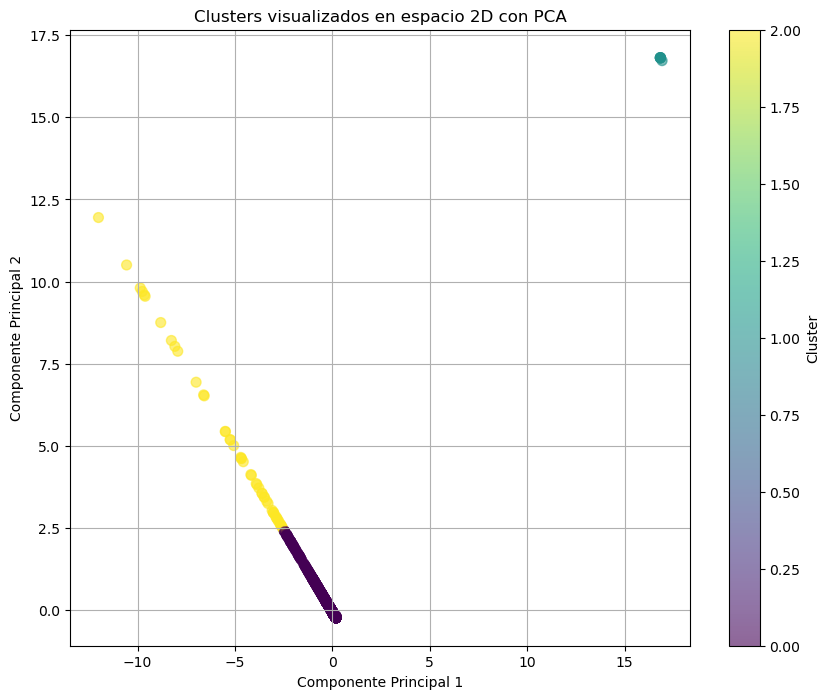

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(compras_df['PCA1'], compras_df['PCA2'], c=compras_df['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Clusters visualizados en espacio 2D con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()